<!-- ![pythonLogo.png](https://www.python.org/static/community_logos/python-powered-w-200x80.png) -->

# 08 Heaps 


## Plan for the lecture 

* Recap on Stacks and Queues

* Heaps as a Binary Tree

* Heapify and Heap Sort

* PriorityQueue using a Heap

## Recap on Stacks and Queues

## Stacks are LIFO

* attribute: `top` pointer 

* add (`push`) to the top of the stack (last in)

* remove (`pop`) from the top of the stack (first out)

<img src="https://scaler.com/topics/images/working-of-stack-in-java.gif" alt="stack_gif" width="650"> 

## Queues are FIFO 

* attributes: `front` and `back`

* join (`enqueue`) the back of the queue (first in)

* served / removed (`dequeue`) from the front of the queue (first out)

<img src="https://www.scaler.com/topics/images/working-of-java-queue.gif" alt="stack_gif" width="650">  

## Stack and Heap as stores of memory 

<b>Stack</b>:

When a program is instructed to execute a function via a function call, a new item, a so-called stack frame, is created and pushed onto the stack for that function call. The stack frame contains:

* Local function variables.

* Parameters passed to the function.

* The return address that tells the program where to continue executing once the function completes.

* Other administrative details, such as the base pointer of the previous frame.

When the function finishes execution, the stack frame is popped off, and the system hands over the control to the return address specified in the frame.

<img src="https://unicminds.com/wp-content/uploads/2022/09/StackvsHeap-Expalined-for-Kids.png" alt="stack_heap" width="650"> 

## Stacks for memory management in programs

Stack advantages: 

* <b>Fast Allocation/Deallocation</b>. Allocating and deallocating memory on the stack is fast and accomplished by simply adjusting the stack pointer value. The stack pointer is moved up to allocate and down to deallocate space (some systems may apply the opposite down/up convention).
* <b>Automatic Memory Management</b>. Memory space on the stack is managed automatically. Space for local variables is automatically allocated when a function is called and deallocated when a function exits.
* <b>No Fragmentation</b>. Memory allocation is sequential and consistent, eliminating memory fragmentation and ensuring the efficient use of free space.
* <b>Predictable Lifespan</b>. Variables on the stack exist only for the duration of the function or scope they are in. This predictability makes code easier to write and read.


Stack disadvantages: 

* <b>Limited Size</b>. Stack memory is limited in size, and once it is exhausted, it results in a stack overflow, causing the program to crash. This makes the stack unsuitable for storing large amounts of data.
* <b>Limited Access</b>. The Last in First Out (LIFO) principle of the stack means that standard operations primarily interact with the top of the stack. Direct random access to other locations in the stack beyond current scope boundaries can lead to errors.
* <b>No Resizing</b>. The stack does not allow memory block resizing once they are allocated. For instance, if you allocate too little memory for an array on the stack, it cannot be resized like with dynamically allocated memory.


<img src="https://phoenixnap.com/kb/wp-content/uploads/2023/09/stack-memory-function-calls.png" alt="stack_mem" width="650"> 

https://phoenixnap.com/kb/stack-vs-heap

## So what is a heap?

* A heap is a region of computer memory used for dynamic memory allocation. 

* In the heap, variables require explicit creation and deletion. For example, C and C++ developers use functions and operators like `malloc()`, `free()`, `new`, or `delete` to allocate and deallocate memory.

Heap is typically used:

* When the memory requirement for a data structure, such as an array or object, is unknown until runtime.

* To store data that should persist beyond the lifespan of a single function call.

* When there is a possibility that allocated memory might need resizing in the future.

<img src="https://phoenixnap.com/kb/wp-content/uploads/2023/09/heap-memory-objects-array.png" alt="heap_mem" width="650"> 

https://phoenixnap.com/kb/stack-vs-heap



Heap advantages:

* <b>Dynamic Allocation</b>. Programs can allocate memory at runtime based on their needs, resulting in more efficient memory use. 
* <b>Variable Lifetime</b>. Objects allocated on the heap persist until they are explicitly deallocated or the program ends. They can outlive the function call that created them, which is especially useful for data that needs to persist across multiple function calls or even for the duration of the program.
* <b>Large Memory Pool</b>. The heap provides a much larger memory pool than the stack. It is suitable for allocating larger data structures or ones that might grow, like arrays or lists.
* <b>Globally Accessible</b>. Heap memory is globally accessible, meaning it can be accessed and modified by any part of the code and is not bound by the call stack. Sharing data across different parts of a program or even between threads is a clear benefit.
* <b>Support for Complex Structures</b>. Heap memory can build and manage complex data structures like trees, graphs, and linked lists, which might require frequent and dynamic memory allocations and deallocations.

Heap disadvantages: 

* <b>Hands-on Memory Management</b>. Heap memory requires explicit management. Developers must manually allocate and deallocate memory, which can introduce potential errors and consume additional resources.
* <b>Memory Leaks</b>. If the memory is not deallocated after it serves its function, it may result in memory leaks. This means the program consumes memory, eventually leading to out-of-memory errors, especially in long-running applications.
* <b>Fragmentation</b>. Memory on the heap is allocated and deallocated dynamically. This can lead to scattered, unused memory blocks (external fragmentation) or small wasted spaces within the allocated blocks (internal fragmentation).
* <b>Slower Access</b>. Accessing variables on the heap is generally slower than accessing variables on the stack.
* <b>Dangling Pointers</b>. Pointers referencing deallocated memory locations can become dangling pointers. Accessing or modifying data through such pointers can lead to undefined behavior.

<img src="https://cdn-images-1.medium.com/max/1024/0*1JqU8aiqRnpFUlLI" alt="mem_management" width="650"> 

https://www.elli.eco/en/about-elli/news/newsroom/elli-engineering/catch-me-if-you-canmemory-leaks 

## Heaps as an Array and a Binary Tree

* Heaps are an implementation of a priority queue - as an array.

* However, the arrangement of the elements in this array can be visualised as a Binary Tree 

* A Binary Tree will have a maximum of two children. Children are added layer by layer, left to right. 

* A Complete Binary Tree is when each parent of a given level has exactly two children.



![heapify](https://miro.medium.com/v2/resize:fit:1266/format:webp/1*IJDDOZOsFGLpf445qo1XKw.png)

## Heap Properities:

* root of tree = first element (i = 0) 

* parent(i) = `floor(i-1)/2`

* left(i) = `(2 * i) + 1`

* right(i) = `(2 * i) + 2`

In [20]:
arr = [5, 11, 9]
arr

[5, 11, 9]

As a Binary Tree: 

```
    5
   / \
 11   9
```

In [21]:
arr = [8, 4, 6, 23, 12, 18, 17]
arr

[18, 4, 6, 23, 12, 18, 17]

As a Binary Tree: 

```
        8
      /   \
    4      6
  /  \    /  \
23   12  18  17  
```

## Max-Heap and Min-Heap 

* Heaps can be sorted, and are commonly ordered as a `min-heap` where the lowest value is the root, or a `max-heap` where the largest value is the root. 

* Therefore, `min-heaps` and `max-heaps` will help us to locate the lowest and highest values efficiently. 

* Heaps can therefore be applied in path finding algorithms (e.g. Dijkstra's algorithm), as well as other applications such as a priority queue and task schedulers, where rank order is important.

![min_max_heaps](https://miro.medium.com/v2/resize:fit:1316/format:webp/1*02r6G-ho8DPnfiaOIHA2OA.png)

## Heap as a Tree

* See below that both the min-heap and the max-heap do not store the items in order of highest to lowest / lowest to highest 

* Instead there is a patten in which they are stored: 

* Parent of node at index i: `floor((i - 1) / 2)`

* Left child of node at index i: `2 * i + 1`

* Right child of node at index i: `2 * i + 2`



![heapify](https://miro.medium.com/v2/resize:fit:1266/format:webp/1*IJDDOZOsFGLpf445qo1XKw.png)

## Identifying layers of a `max-heap` in an array: 

* Important to note that a max-heap and min-heaps are NOT a Binary Search Tree (BST).

* They are <b>Binary Trees</b> - all levels are fully filled except possibly the last, which is filled from left to right 

* Describe the ordering property for both min-heaps and max-heaps, emphasizing that the order only applies between parents and direct children (not across all nodes).

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/02/max-heap-layered.png" alt="heap_as_BinaryTree" width="850"> 


<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/02/max-heap-array.png" alt="heap_as_array" width="850"> 

## Adhering to the Heap properties

* Parent of node at index i: `floor((i - 1) / 2)`

* Left child of node at index i: `2 * i + 1`

* Right child of node at index i: `2 * i + 2`

In [3]:
arr = [31, 28, 25, 21, 23, 21, 15, 7, 5, 20, 15, 10]
arr

[31, 28, 25, 21, 23, 21, 15, 7, 5, 20, 15, 10]

* Of the array above, let's demonstrate this formula. 

* Let's start with position 5, which is value 21

In [4]:
i = 5  # 21
arr[5]

21

Aiming to find the left value of 5 by applying the following left formula: 

* `2 * i + 1`


In [5]:
(2 * i) + 1

11

Let's look at position 11 to see if it is the left hand child of position 5 (21)

In [6]:
arr[11]  # 10

10

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/02/max-heap-layered.png" alt="heap_as_BinaryTree" width="850"> 

Nice! 10 is the left hand child of 21. 

Now, let's check the parent of value 21 (position 5 in the array)

In [11]:
arr

[31, 28, 25, 21, 23, 21, 15, 7, 5, 20, 15, 10]

In [12]:
i = 5 

* Parent of node at index i: `floor((i - 1) / 2)`

In [14]:
(i - 1) // 2 # gives us position 2, which should be 25

2

In [3]:
arr[2] # position 2 = value 25

25

Nice! We found the parent of node 21

## Heaps can be used to identify min and max values efficiently

* If you have a stream of values coming in, and at any given time you may be asked to process the maximum or minimum value, then a heap is what you want. 

* A <b>max-heap</b> is used to extract and process the maximum; 

* A <b>min-heap</b> is used to extract and process the minimum.


In [16]:
arr

[31, 28, 25, 21, 23, 21, 15, 7, 5, 20, 15, 10]

In [4]:
max(arr)

31

In [19]:
arr[0]

31

An `extract_max()` would run in $O(1)$ for a max-heap as the max should be at the head of the list

## Heap Sort

* The Heap sort algorithm was invented by J.W.J Williams in 1964.

* Heap Sort is a selection-based sorting algorithm that:

    1. <b>first builds a heap from the input data</b>
    2. <b>repeatedly extracts the maximum (or minimum) element from the heap to build the sorted list</b>. 
    It can be implemented as either a max-heap or a min-heap.

* Can be performed on an array in $O(n$ $log$ $n)$ time

* The below heap sort will first build max-heap, and then sort in chronological order.

![heap_sort_gif](https://upload.wikimedia.org/wikipedia/commons/4/4d/Heapsort-example.gif)

In [7]:
def heapify(arr, n, i):
    largest = i         # Initialize largest as root
    left = 2 * i + 1    # Left child index
    right = 2 * i + 2   # Right child index

    # Check if left child exists and is greater than root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Check if right child exists and is greater than the current largest
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If the largest is not the root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)  # Recursively heapify the affected subtree


In [9]:
def heap_sort(arr):
    n = len(arr)

    # Step 1: Build a max heap
    for i in range(n // 2 - 1, -1, -1):  # Start from last non-leaf node
        heapify(arr, n, i)
    
    print("Heapified:", arr)
    
    # Step 2: Extract elements from heap one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap current root to end
        heapify(arr, i, 0)  # Heapify root for the reduced heap

In [10]:
arr = [15, 12, 11, 17, 13, 5, 6, 7] # unordered array

print("Unsorted:", arr)

heap_sort(arr)

print("Sorted array:", arr)

Unsorted: [15, 12, 11, 17, 13, 5, 6, 7]
Heapified: [17, 15, 11, 12, 13, 5, 6, 7]
Sorted array: [5, 6, 7, 11, 12, 13, 15, 17]


## Inserting new items into a heap

* Insert Operation: $O(log$ $n)$ due to the `_sift_up()` process that traverses the height of the heap, which is $O(log$ $n)$  for a complete binary tree.

In [11]:
class MinHeap:
    def __init__(self):
        self.heap = []  # Using a list to store heap elements

    def insert(self, value):
        # Add the new value to the end of the heap (list)
        self.heap.append(value)
        # Sift up to maintain heap property
        self._sift_up(len(self.heap) - 1)

    def _sift_up(self, index):
        # Move the element at 'index' up to its correct position
        parent_index = (index - 1) // 2  # Parent node index

        # Continue until the element is at the root or the parent is smaller
        while index > 0 and self.heap[index] < self.heap[parent_index]:
            # Swap if the current element is smaller than the parent
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            index = parent_index  # Update the index to the parent's position
            parent_index = (index - 1) // 2  # Update parent index

    def get_min(self):
        # Returns the minimum element (root of the heap)
        if self.heap:
            return self.heap[0]
        return None


In [12]:
min_heap = MinHeap()
min_heap.insert(10)
min_heap.insert(3)
min_heap.insert(15)
min_heap.insert(6)

print("Heap array:", min_heap.heap)  # This should maintain the min-heap order
print("Minimum element:", min_heap.get_min())  # Should print 3, the smallest element

Heap array: [3, 6, 15, 10]
Minimum element: 3


## Python's `heapq` library

In [13]:
import heapq

In [14]:
dir(heapq)

['__about__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_heapify_max',
 '_heappop_max',
 '_heapreplace_max',
 '_siftdown',
 '_siftdown_max',
 '_siftup',
 '_siftup_max',
 'heapify',
 'heappop',
 'heappush',
 'heappushpop',
 'heapreplace',
 'merge',
 'nlargest',
 'nsmallest']

## Visualisation of a heap: 

https://www.cs.usfca.edu/~galles/visualization/Heap.html

http://www.cs.tufts.edu/r/redline/heapviz/

## `heapify` - `min-heap` by default

* Heapify is a common function, in Python, included in the library `heapq` and is a way to create a `min-heap` from an unsorted data structure (e.g. an array or a list)

* Heapify is the modified version of `heap sort` technique (which we'll see later in this notebook). 

* Here we will sort via smallest to largest



In [15]:
# Sample list
data = [9, 5, 6, 2, 3]

# Heapify the list
heapq.heapify(data)
print("Heapified list:", data)  # Output: [2, 3, 6, 5, 9]


Heapified list: [2, 3, 6, 5, 9]


In [16]:
data = [2, 7, 1, 9, 1, 7, 5, 2]
heapq.heapify(data)
print("Heapified list:", data)


Heapified list: [1, 1, 2, 2, 7, 7, 5, 9]


## `heapify` to create a `max-heap`

* If we wanted to create a max-heap, we could convert the numbers from positive to negative.

* This would 'mirror' the view of the numbers - giving us largest to smallest

* We just need to remember to cast back to positive once sorted!

![heapify_gif](https://media2.dev.to/dynamic/image/width=1000,height=420,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2Fdpy879r83nua30a2ntgf.gif)

In [17]:
import heapq

numbers = [9, 5, 6, 2, 3]
# Convert to negative to simulate a max-heap
numbers = [-num for num in numbers]
heapq.heapify(numbers)

numbers


[-9, -5, -6, -2, -3]

In [18]:
numbers = [-num for num in numbers]
numbers

[9, 5, 6, 2, 3]

## `heappush` and `heappop`

* Remember `push` and `pop` from stack terminology?

In [19]:
# Push a new element
heapq.heappush(data, 1)
print("After pushing 1:", data)  # Output: [1, 2, 6, 5, 9, 3]

# Pop the smallest element
smallest = heapq.heappop(data)
print("Popped smallest element:", smallest)  # Output: 1
print("Heap after pop:", data)  # Output: [2, 3, 6, 5, 9]

After pushing 1: [1, 1, 2, 1, 7, 7, 5, 9, 2]
Popped smallest element: 1
Heap after pop: [1, 1, 2, 2, 7, 7, 5, 9]


## Finding the K largest or smallest elements

In [24]:
import heapq

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
top_3 = heapq.nlargest(3, data)

print("heap:", data) 
print("Top 3 Largest Elements:", top_3)

heap: [3, 1, 4, 1, 5, 9, 2, 6, 5]
Top 3 Largest Elements: [9, 6, 5]


In [25]:
import heapq

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
top_3 = heapq.nsmallest(3, data)
print("heap:", data) 
print("Top 3 Smallest:", top_3)

heap: [3, 1, 4, 1, 5, 9, 2, 6, 5]
Top 3 Smallest: [1, 1, 2]


## Creating a class for MaxHeap

In [26]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def insert(self, key):
        self.heap.append(key)
        self._heapify_up(len(self.heap) - 1)

    def extract_max(self):
        if not self.heap:
            return None
        max_val = self.heap[0]
        # Move the last element to the root
        self.heap[0] = self.heap.pop()
        self._heapify_down(0)
        return max_val

    def _heapify_up(self, index):
        parent = (index - 1) // 2
        if index > 0 and self.heap[parent] < self.heap[index]:
            # Swap
            self.heap[parent], self.heap[index] = self.heap[index], self.heap[parent]
            self._heapify_up(parent)

    def _heapify_down(self, index):
        largest = index
        left = 2 * index + 1
        right = 2 * index + 2

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left

        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != index:
            # Swap
            self.heap[largest], self.heap[index] = self.heap[index], self.heap[largest]
            self._heapify_down(largest)

    def peek_max(self):
        return self.heap[0] if self.heap else None

    def __str__(self):
        return str(self.heap)

In [27]:
# Example Usage
if __name__ == "__main__":
    mh = MaxHeap()
    elements = [3, 1, 6, 5, 2, 4]
    for elem in elements:
        mh.insert(elem)
        print(f"Inserted {elem}: Heap = {mh}")

    print(f"Max element: {mh.extract_max()}")
    print(f"Heap after extraction: {mh}")

Inserted 3: Heap = [3]
Inserted 1: Heap = [3, 1]
Inserted 6: Heap = [6, 1, 3]
Inserted 5: Heap = [6, 5, 3, 1]
Inserted 2: Heap = [6, 5, 3, 1, 2]
Inserted 4: Heap = [6, 5, 4, 1, 2, 3]
Max element: 6
Heap after extraction: [5, 3, 4, 1, 2]


## Heap Sort with `heapq`

* Remember our heap sort algorithm above? 

* Let's now amend it to use `heapq's` functions

* $O(n$ $log$ $n)$

![heap_sort_gif](https://upload.wikimedia.org/wikipedia/commons/4/4d/Heapsort-example.gif)

In [28]:
import heapq

def heap_sort(iterable):
    h = []
    for value in iterable:
        heapq.heappush(h, value)
    sorted_list = []
    while h:
        sorted_list.append(heapq.heappop(h))
    return sorted_list

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
sorted_data = heap_sort(data)
print("Sorted Data:", sorted_data)

Sorted Data: [1, 1, 2, 3, 4, 5, 5, 6, 9]


Original Data: [3, 1, 6, 5, 2, 4]
Building the max heap...


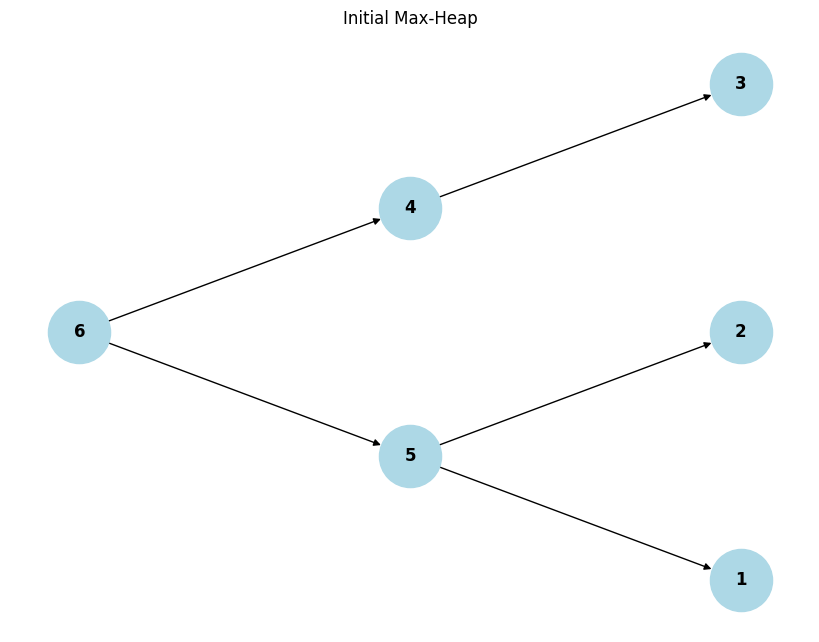

Swapping root 6 with element 3...


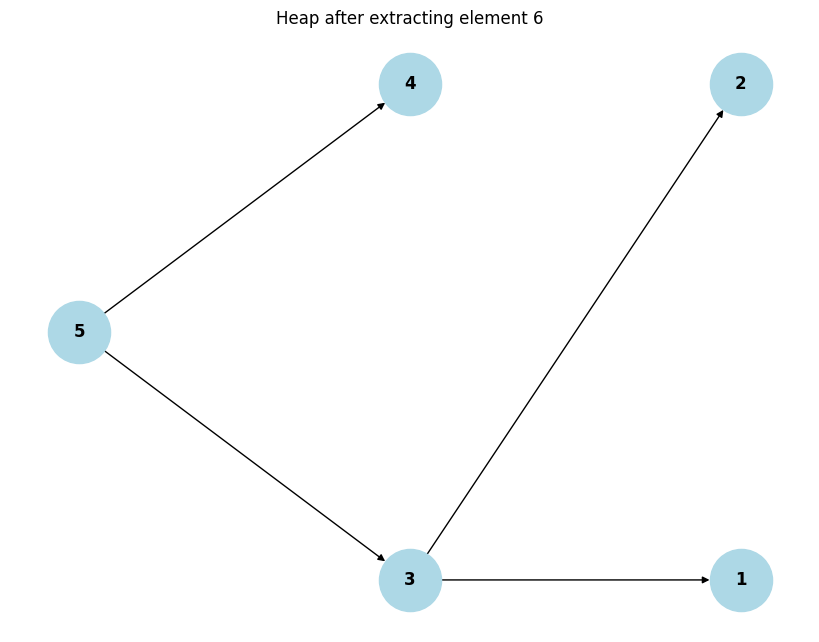

Swapping root 5 with element 2...


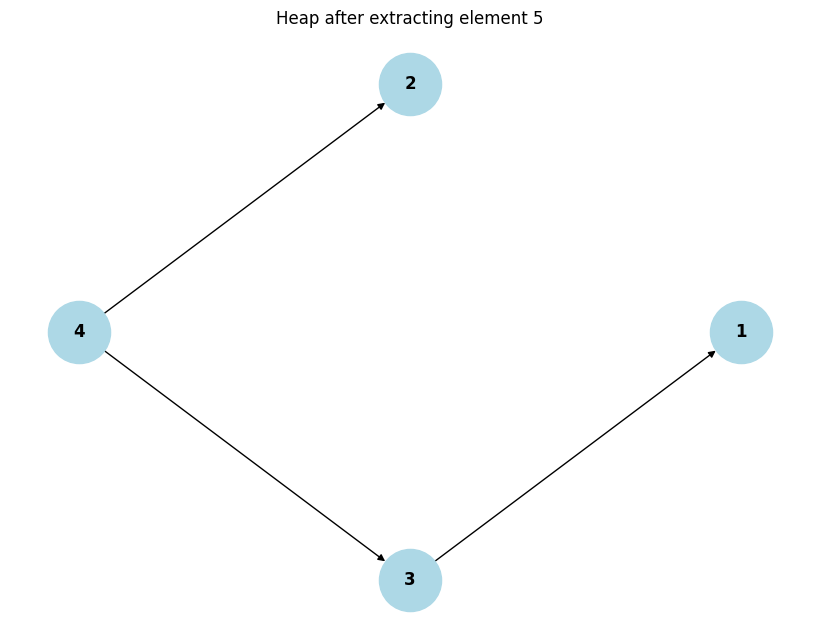

Swapping root 4 with element 1...


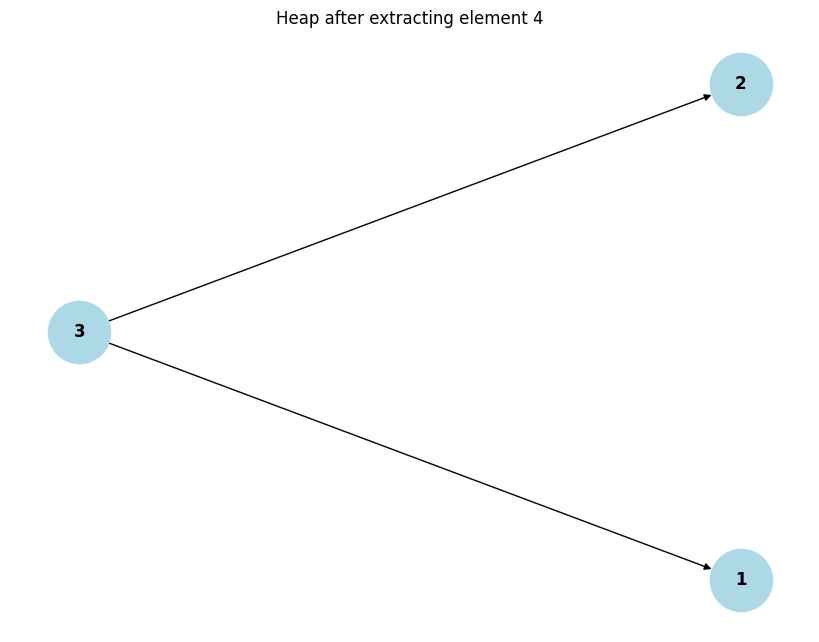

Swapping root 3 with element 2...


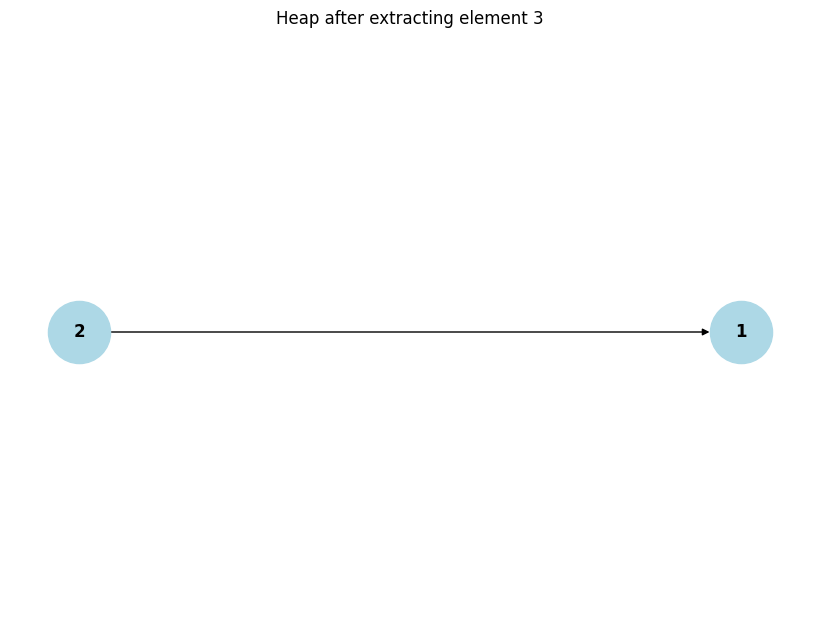

Swapping root 2 with element 1...


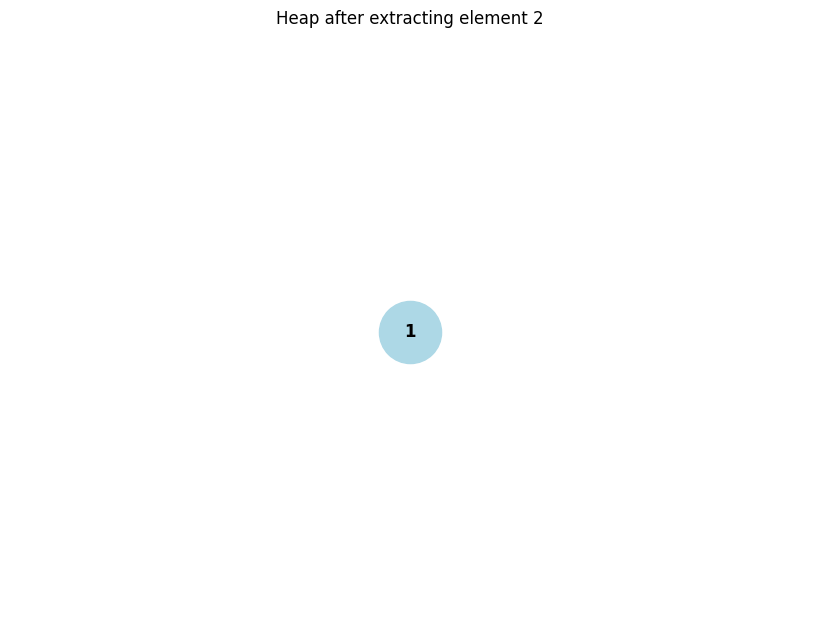

Heap Sort Completed.
Sorted Array: [1, 2, 3, 4, 5, 6]


In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def build_binary_heap_graph(heap):
    """
    Constructs a binary heap graph from a list of heap elements.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - G (networkx.DiGraph): The constructed directed graph representing the heap.
    """
    G = nx.DiGraph()
    n = len(heap)
    for i in range(n):
        G.add_node(i, label=heap[i])
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n:
            G.add_edge(i, left)
        if right < n:
            G.add_edge(i, right)
    return G

def assign_levels(heap):
    """
    Assigns a level to each node in the heap based on its index.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - levels (dict): A dictionary mapping node indices to their levels.
    """
    levels = {}
    for i in range(len(heap)):
        levels[i] = math.floor(math.log2(i + 1))
    return levels

def visualize_heap(G, levels, heap, title="Heap Visualization"):
    """
    Visualizes the binary heap using NetworkX and Matplotlib with the root at the top.
    
    Parameters:
    - G (networkx.DiGraph): The heap graph.
    - levels (dict): Node index to level mapping.
    - heap (list): The list representing the heap.
    - title (str): The title of the plot.
    """
    # Assign 'subset' attribute to each node based on its level
    for node in G.nodes():
        G.nodes[node]['subset'] = levels[node]
    
    # Use multipartite_layout with the 'subset' attribute
    pos = nx.multipartite_layout(G, subset_key='subset')
    
    # Flip the y-coordinates to have the root at the top
    for node in pos:
        pos[node][1] = -pos[node][1]
    
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(8,6))
    nx.draw(
        G, pos, 
        with_labels=True, 
        labels=labels, 
        node_size=2000, 
        node_color='lightblue', 
        font_size=12, 
        font_weight='bold'
    )
    plt.title(title)
    plt.axis('off')  # Hide the axes for better visual appeal
    plt.show()

def heapify(arr, n, i, steps=[]):
    """
    Maintains the max-heap property for a subtree rooted at index i and records steps for visualization.
    
    Parameters:
    - arr (list): The list representing the heap.
    - n (int): Size of the heap.
    - i (int): Root index of the subtree.
    - steps (list): Accumulates steps for visualization.
    
    Returns:
    - None: The heap is modified in-place.
    """
    largest = i         # Initialize largest as root
    left = 2 * i + 1    # Left child index
    right = 2 * i + 2   # Right child index

    # See if left child exists and is greater than root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # See if right child exists and is greater than current largest
    if right < n and arr[right] > arr[largest]:
        largest = right

    # Change root if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        steps.append(arr.copy())  # Record the step after swap
        # Heapify the root again to ensure it's a max-heap
        heapify(arr, n, largest, steps)

def heap_sort_visualized(arr):
    """
    Sorts a list in ascending order using Heap Sort and visualizes each step.
    
    Parameters:
    - arr (list): The list of elements to sort.
    
    Returns:
    - None: The list is sorted in-place with visualizations.
    """
    n = len(arr)
    steps = []

    print("Building the max heap...")
    # Build a max-heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, steps)

    # Visualize the initial max-heap
    G = build_binary_heap_graph(arr)
    levels = assign_levels(arr)
    visualize_heap(G, levels, arr, title="Initial Max-Heap")

    # Extract elements from the heap one by one
    for i in range(n - 1, 0, -1):
        print(f"Swapping root {arr[0]} with element {arr[i]}...")
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        steps.append(arr.copy())  # Record the step after swap

        # Heapify the reduced heap
        heapify(arr, i, 0, steps)

        # Visualize the current state of the heap
        current_heap = arr[:i]
        G = build_binary_heap_graph(current_heap)
        levels = assign_levels(current_heap)
        visualize_heap(G, levels, current_heap, title=f"Heap after extracting element {arr[i]}")

    print("Heap Sort Completed.")
    print("Sorted Array:", arr)

# Example Usage
if __name__ == "__main__":
    data = [3, 1, 6, 5, 2, 4]
    print("Original Data:", data)
    heap_sort_visualized(data)

## How to Implement a Priority Queue using a Heap

* A heap can be used to implement a priority queue. In a priority queue, each element has a priority that determines its importance. 

* In some applications, the priorities of important elements are big numbers, in which case a max-heap should be used. 

## Priority Queue

* For some tasks and applications, it may not be first in first out (FIFO), but instead items added are sorted / ranked in order of priority. 

* A priority could be an category (high, medium, low) - which could be quantified (3,2,1)

* Therefore, we retain the removal from the front of the queue (first out), but not necessarily first in.

* The below codifies the priority as `1` for low, and `3` for high. Therefore, a new item with a priority of `3` is added (enqueued) ahead of the lower priority nodes.

![priority_queue](https://learnersbucket.com/wp-content/uploads/2019/09/ezgif.com-optimize-2.gif)

In [30]:
class Node:
    def __init__(self, value, priority=0):
        self.value = value
        self.priority = priority
        self.next_node = None
    
    def get_value(self):
        return self.value

    def get_priority(self):
        return self.priority

    def get_next_node(self):
        return self.next_node

    def set_next_node(self, next_node):
        self.next_node = next_node


In [31]:
class PriorityQueue:
    def __init__(self, max_size=None):
        self.head = None
        self.tail = None
        self.max_size = max_size
        self.size = 0

    def has_space(self):
        return self.max_size is None or self.size < self.max_size

    def is_empty(self):
        return self.size == 0

    def enqueue(self, value, priority=0):
        if self.has_space():
            item_to_add = Node(value, priority)
            print(f"Adding {item_to_add.get_value()} with priority {item_to_add.get_priority()} to the queue!")
            
            if self.is_empty():
                self.head = item_to_add
                self.tail = item_to_add
            else:
                # Find the correct position based on priority
                if item_to_add.get_priority() > self.head.get_priority():
                    # New item has the highest priority, becomes the new head
                    item_to_add.set_next_node(self.head)
                    self.head = item_to_add
                else:
                    # Insert in the middle or end
                    current = self.head
                    while (current.get_next_node() and
                           current.get_next_node().get_priority() >= item_to_add.get_priority()):
                        current = current.get_next_node()
                    
                    # Insert item at the position found
                    item_to_add.set_next_node(current.get_next_node())
                    current.set_next_node(item_to_add)
                    # Update tail if item is added to the end
                    if item_to_add.get_next_node() is None:
                        self.tail = item_to_add

            self.size += 1
        else:
            print("Sorry, no more room!")
    
    def dequeue(self):
        if not self.is_empty():
            item_to_remove = self.head
            self.head = self.head.get_next_node()
            self.size -= 1
            print(f"Removing {item_to_remove.get_value()} from the queue.")
            if self.is_empty():
                self.tail = None
            return item_to_remove.get_value()
        else:
            print("Queue is empty.")
            return None

In [32]:
pq = PriorityQueue()

pq.enqueue("Task 1", priority=2)
pq.enqueue("Task 5", priority=5)
pq.enqueue("Task 2", priority=1)
pq.enqueue("Task 3", priority=3)
pq.enqueue("Task 4", priority=4)

pq.dequeue()  # Should remove "Task 5" since it has the highest priority

Adding Task 1 with priority 2 to the queue!
Adding Task 5 with priority 5 to the queue!
Adding Task 2 with priority 1 to the queue!
Adding Task 3 with priority 3 to the queue!
Adding Task 4 with priority 4 to the queue!
Removing Task 5 from the queue.


'Task 5'

## Let's adapt to use a min-heap

* Use an Array for Heap Storage: Store elements in an array and manage the heap properties.

* Heapify Up and Down: Define helper methods to maintain the heap structure after insertion (heapify_up) and removal (heapify_down).

* Implement Insert and Extract-Min: Modify enqueue and dequeue methods to use heap operations instead of linked list or other linear data structures.

In [33]:
class MinHeapPriorityQueue:
    def __init__(self):
        self.heap = []  # Array-based heap

    def is_empty(self):
        return len(self.heap) == 0

    def peek(self):
        if self.is_empty():
            print("Priority queue is empty")
            return None
        return self.heap[0]

    def enqueue(self, value):
        # Insert new value at the end of the heap
        self.heap.append(value)
        print(f"Enqueued: {value}")
        # Heapify up to maintain heap property
        self._heapify_up(len(self.heap) - 1)

    def dequeue(self):
        if self.is_empty():
            print("Priority queue is empty. Cannot dequeue.")
            return None
        # Swap the root (smallest element) with the last element
        self._swap(0, len(self.heap) - 1)
        # Remove the last element (original root)
        min_value = self.heap.pop()
        print(f"Dequeued: {min_value}")
        # Heapify down to maintain heap property
        if not self.is_empty():
            self._heapify_down(0)
        return min_value

    def _heapify_up(self, index):
        # Heapify up to restore min-heap property
        parent_index = (index - 1) // 2
        if index > 0 and self.heap[index] < self.heap[parent_index]:
            # Swap if child is smaller than parent
            self._swap(index, parent_index)
            # Recursive call on the parent index
            self._heapify_up(parent_index)

    def _heapify_down(self, index):
        # Heapify down to restore min-heap property
        smallest = index
        left_child = 2 * index + 1
        right_child = 2 * index + 2

        # Check if left child exists and is smaller
        if left_child < len(self.heap) and self.heap[left_child] < self.heap[smallest]:
            smallest = left_child

        # Check if right child exists and is smaller
        if right_child < len(self.heap) and self.heap[right_child] < self.heap[smallest]:
            smallest = right_child

        # If the smallest value isn't at the index, swap and heapify down
        if smallest != index:
            self._swap(index, smallest)
            self._heapify_down(smallest)

    def _swap(self, i, j):
        # Swap elements in the heap array
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    def __str__(self):
        # Display the priority queue (heap) as a list
        return f"MinHeapPriorityQueue({self.heap})"

In [34]:
pq = MinHeapPriorityQueue()
pq.enqueue(10)
pq.enqueue(5)
pq.enqueue(3)
pq.enqueue(4)
print(pq)      # Expected min-heap order: MinHeapPriorityQueue([3, 4, 5, 10])

pq.dequeue()   # Removes the smallest element (3)
print(pq)      # Expected min-heap order: MinHeapPriorityQueue([4, 10, 5])

pq.enqueue(2)  # Adds 2, which becomes the new minimum
print(pq)      # Expected min-heap order: MinHeapPriorityQueue([2, 4, 5, 10])

Enqueued: 10
Enqueued: 5
Enqueued: 3
Enqueued: 4
MinHeapPriorityQueue([3, 4, 5, 10])
Dequeued: 3
MinHeapPriorityQueue([4, 10, 5])
Enqueued: 2
MinHeapPriorityQueue([2, 4, 5, 10])


## Now let's apply the `heapq` library 

* Efficient Min-Heap Management: heapq provides $O(log$ $n)$ insertion and removal.

* Built-In Heap Management: No need to manually implement heapify_up or heapify_down—heapq handles it.

* Simple API: Using heappush and heappop makes the code cleaner and more maintainable.

In [26]:
import heapq

In [36]:
class PriorityQueue:
    def __init__(self):
        self.heap = []  # Initialize an empty heap

    def is_empty(self):
        return len(self.heap) == 0

    def peek(self):
        if self.is_empty():
            print("Priority queue is empty")
            return None
        return self.heap[0]

    def enqueue(self, value):
        # Use heappush to add an element while maintaining the heap property
        heapq.heappush(self.heap, value)
        print(f"Enqueued: {value}")

    def dequeue(self):
        if self.is_empty():
            print("Priority queue is empty. Cannot dequeue.")
            return None
        # Use heappop to remove and return the smallest element
        min_value = heapq.heappop(self.heap)
        print(f"Dequeued: {min_value}")
        return min_value

    def __str__(self):
        # Display the priority queue (heap) as a list
        return f"PriorityQueue({self.heap})"

In [37]:
pq = PriorityQueue()
pq.enqueue(10)
pq.enqueue(5)
pq.enqueue(3)
pq.enqueue(4)
print(pq)      # Expected min-heap order: PriorityQueue([3, 4, 5, 10])

pq.dequeue()   # Removes the smallest element (3)
print(pq)      # Expected min-heap order: PriorityQueue([4, 10, 5])

pq.enqueue(2)  # Adds 2, which becomes the new minimum
print(pq)      # Expected min-heap order: PriorityQueue([2, 4, 5, 10])

Enqueued: 10
Enqueued: 5
Enqueued: 3
Enqueued: 4
PriorityQueue([3, 4, 5, 10])
Dequeued: 3
PriorityQueue([4, 10, 5])
Enqueued: 2
PriorityQueue([2, 4, 5, 10])


## Scenario Exercise: Task Scheduler


In [30]:
import heapq

tasks = []
# (priority, task_name)
heapq.heappush(tasks, (4, 'Clean the house'))
heapq.heappush(tasks, (1, 'Pay bills'))
heapq.heappush(tasks, (3, 'Read a book'))
heapq.heappush(tasks, (2, "Submit assignment"))

while tasks:
    priority, task = heapq.heappop(tasks)
    print(f"Processing task: {task} with priority {priority}")

Processing task: Pay bills with priority 1
Processing task: Submit assignment with priority 2
Processing task: Read a book with priority 3
Processing task: Clean the house with priority 4


## Visualising a heap via `networkx`


`pip install networkx matplotlib`  
  `python3 -m pip install -U networkx matplotlib --user`

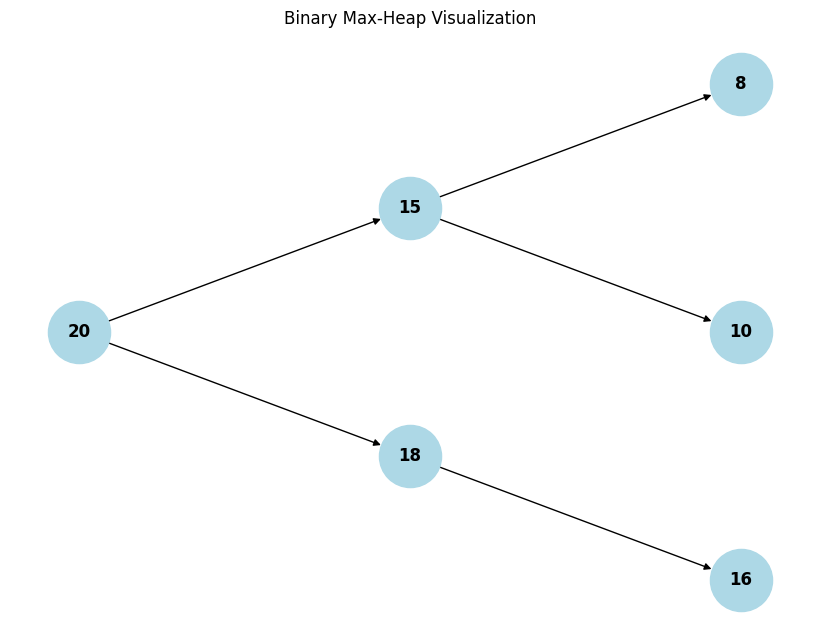

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def build_binary_heap_graph(heap):
    """
    Constructs a binary heap graph from a list of heap elements.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - G (networkx.DiGraph): The constructed directed graph representing the heap.
    """
    G = nx.DiGraph()
    n = len(heap)
    for i in range(n):
        G.add_node(i, label=heap[i])
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n:
            G.add_edge(i, left)
        if right < n:
            G.add_edge(i, right)
    return G

def assign_levels(heap):
    """
    Assigns a level to each node in the heap based on its index.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - levels (dict): A dictionary mapping node indices to their levels.
    """
    levels = {}
    for i in range(len(heap)):
        levels[i] = math.floor(math.log2(i + 1))
    return levels

def visualize_heap(G, levels, heap, title="Binary Heap Visualization"):
    """
    Visualizes the binary heap using NetworkX and Matplotlib.
    
    Parameters:
    - G (networkx.DiGraph): The heap graph.
    - levels (dict): Node index to level mapping.
    - heap (list): The list representing the heap.
    - title (str): The title of the plot.
    """
    # Assign 'subset' attribute to each node based on its level
    for node in G.nodes():
        G.nodes[node]['subset'] = levels[node]
    
    # Use multipartite_layout with the 'subset' attribute
    pos = nx.multipartite_layout(G, subset_key='subset')
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(8,6))
    nx.draw(
        G, pos, 
        with_labels=True, 
        labels=labels, 
        node_size=2000, 
        node_color='lightblue', 
        font_size=12, 
        font_weight='bold'
    )
    plt.title(title)
    plt.show()


# Example binary heap (max-heap)
heap = [20, 15, 18, 8, 10, 16]

# Build the graph
G = build_binary_heap_graph(heap)

# Assign levels to each node
levels = assign_levels(heap)

# Visualize the heap
visualize_heap(G, levels, heap, title="Binary Max-Heap Visualization")

## Visualisation with `plotly`
` pip install plotly `

  `python3 -m pip install -U plotly --user`

In [39]:
import plotly.graph_objects as go

def plot_binary_heap_interactive(heap):
    edge_x = []
    edge_y = []
    node_x = []
    node_y = []
    node_labels = []

    def get_position(index, depth=0, pos=0, spacing=1):
        if index >= len(heap):
            return
        x = pos
        y = -depth
        node_x.append(x)
        node_y.append(y)
        node_labels.append(str(heap[index]))
        left = 2 * index + 1
        right = 2 * index + 2
        if left < len(heap):
            edge_x.extend([x, x - spacing, None])
            edge_y.extend([y, y - 1, None])
            get_position(left, depth + 1, pos - spacing / 2, spacing / 2)
        if right < len(heap):
            edge_x.extend([x, x + spacing, None])
            edge_y.extend([y, y - 1, None])
            get_position(right, depth + 1, pos + spacing / 2, spacing / 2)

    get_position(0)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_labels,
        textposition="middle center",
        marker=dict(
            showscale=False,
            color='lightblue',
            size=40,
            line_width=2))

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='Interactive Binary Heap Visualization',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper") ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

# Example binary heap (max-heap)
heap = [20, 15, 18, 8, 10, 16]

plot_binary_heap_interactive(heap)

## Summary 

* Stack vs Heap 

* Heaps are usually stored as arrays, but can be visualised as Binary Trees 

* Heap Sort is $O(n$ $log$ $n)$

* Heap Insert can be achieved in $O(log n)$

* Extracting the min from a min-heap and max element from a max-heap can be achieved in $O(1)$

## Exercise 

Sort the following array into a Max-Heap. Check that the array adheres to the heap properties

In [5]:
arr = list(range(0,10))
arr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# Write your solution here.

## Exercise

Can you write a function to evaluate whether an array is a max or min heap? 

In [ ]:
# Write your solution here.

## Exercise 

If you implemented the `PriorityQueue` class in the 07 notebook (Stacks and Queues), adapt the implementation to become a max-heap using `heapq` functions.  

In [ ]:
# Write your solution here.

## Exercise 

Apply the heap sort algorithm to build a max-heap out a randomly generated array.

Check the array elements are arranged in a way that adheres to the principles of a max-heap. 

In [ ]:
# Write your solution here.

## Exercise 

Following from the previous exercise, providing you've sorted an array into a heap correctly, see if you can build a `BinaryTree` class that will represent the levels of this array. 

Remember that nodes in a Binary Tree can have a maximum of two children, and the layers of the tree are populated left to right, and each node is checked to see if it is less or greater than the parent. These children may then swapped depending on whether it the desired target is a max-heap or a min-heap. 

Extension: use `networkx` to visualise this heap as a Binary Tree.

In [ ]:
# Write your solution here.

In [4]:
# Instantiate the Fibonacci Heap
fib_heap = FibonacciHeap()

# Insert values into the heap
node1 = fib_heap.insert(10)
node2 = fib_heap.insert(3)
node3 = fib_heap.insert(15)
node4 = fib_heap.insert(6)

# Find the minimum element
print("Minimum element:", fib_heap.find_min())  # Should output 3

# Extract the minimum element
print("Extracted min:", fib_heap.extract_min())  # Should output 3
print("New minimum after extraction:", fib_heap.find_min())  # Should output 6

# Decrease the key of an existing node
fib_heap.decrease_key(node3, 2)
print("Minimum after decreasing a key:", fib_heap.find_min())  # Should output 2

# Delete a node
fib_heap.delete(node4)
print("Minimum after deletion:", fib_heap.find_min())  # Should output 2 or 10 depending on the current state

Minimum element: 3
Extracted min: 3
New minimum after extraction: 6
Minimum after decreasing a key: 2
Minimum after deletion: 2
